In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_csv('/content/data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
y=df.Country
df.drop('Status', axis=1, inplace=True)
df.drop('Country',  axis=1, inplace=True)
df.fillna(-999, inplace=True)
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = trans.fit_transform(df)
dataset = pd.DataFrame(data)
print(dataset.describe())

                0            1            2            3            4   \
count  2938.000000  2938.000000  2938.000000  2938.000000  2938.000000   
mean      0.501248     0.978483     0.673540     0.016836     0.921783   
std       0.307589     0.057857     0.082109     0.065515     0.245169   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.266667     0.976103     0.622532     0.000000     0.982889   
50%       0.533333     0.984375     0.663763     0.001667     0.985505   
75%       0.800000     0.987684     0.711963     0.012222     0.989694   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  2938.000000  2938.000000  2938.000000  2938.000000  2938.000000   
mean      0.037898     0.798425     0.011403     0.943862     0.016814   
std       0.102049     0.385076     0.054044     0.103781     0.064178   
min       0.000000     0.000000     0

In [ ]:
scaler=MinMaxScaler()
X = scaler.fit_transform(df)
pca = PCA(n_components=3)
pca.fit(X)
X_3 = pca.transform(X)

In [ ]:
col = ['PC%s' % _ for _ in range(1, 4)]
data_3 = pd.DataFrame(X_3, columns=col)
data_3['Country'] = y
data_3.head()

,PC1,PC2,PC3,Country
0,0.353304,-0.100836,-0.055951,Afghanistan
1,0.316180,-0.113638,-0.048980,Afghanistan
2,0.281589,-0.126716,-0.042600,Afghanistan
3,0.247252,-0.140330,-0.035617,Afghanistan
4,0.212122,-0.152146,-0.028870,Afghanistan


In [ ]:
sns.pairplot(data_3, hue="Country");

In [ ]:
X

array([[1.        , 0.97794118, 0.73286876, ..., 0.9890035 , 0.99953098,
        0.98960479],
       [0.93333333, 0.97325368, 0.73751452, ..., 0.98919813, 0.99952798,
        0.98950672],
       [0.86666667, 0.97325368, 0.73577236, ..., 0.98939276, 0.99952198,
        0.98940865],
       ...,
       [0.13333333, 0.959375  , 0.62253194, ..., 0.97343324, 0.99947897,
        0.98950672],
       [0.06666667, 0.95983456, 0.97851336, ..., 0.9738225 , 0.99947897,
        0.98931058],
       [0.        , 0.96047794, 0.96631823, ..., 0.98306734, 0.99948597,
        0.98931058]])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
data_km = pd.DataFrame(X_3, columns=col)
data_km['Country'] = kmeans.labels_
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

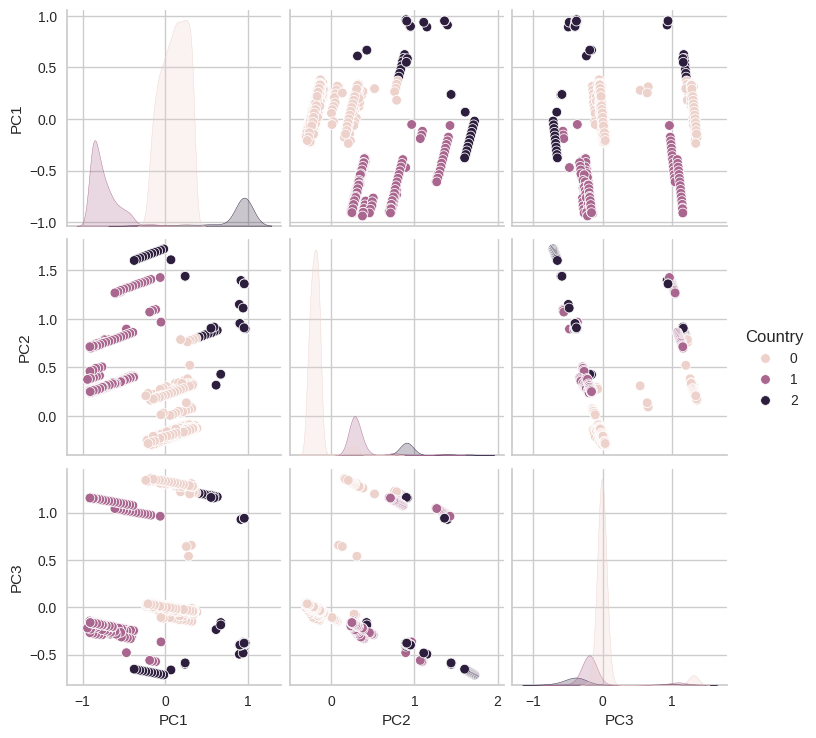

In [ ]:
sns.pairplot(data_km, hue='Country')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

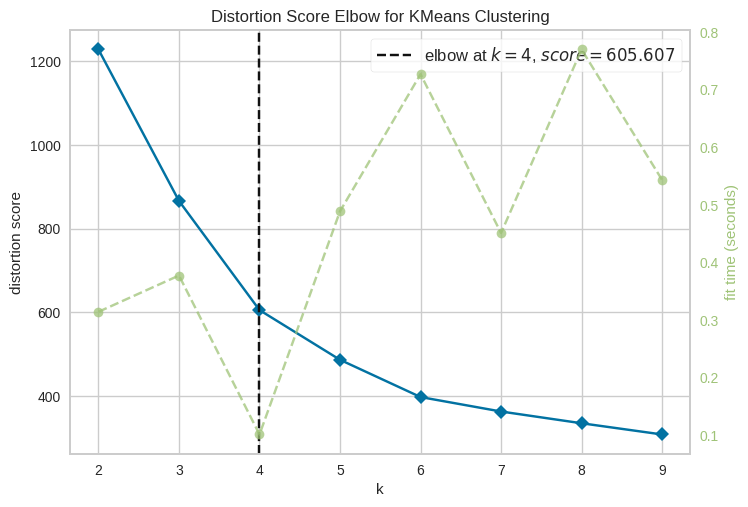

In [ ]:
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2, 10))
visualizer.fit(X)
visualizer.show();

In [ ]:
db=DBSCAN(eps=0.3, min_samples=3).fit(X)
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.4 MB/s eta 0:00:00


In [ ]:
cbc = CatBoostClassifier()

cbc.fit(X, db.labels_==0)

Learning rate set to 0.083598
0:	learn: 1.8647743	total: 314ms	remaining: 5m 13s
1:	learn: 1.5462331	total: 527ms	remaining: 4m 23s
2:	learn: 1.3286688	total: 693ms	remaining: 3m 50s
3:	learn: 1.1642855	total: 867ms	remaining: 3m 35s
4:	learn: 1.0335593	total: 1.02s	remaining: 3m 22s
5:	learn: 0.9286278	total: 1.2s	remaining: 3m 18s
6:	learn: 0.8397422	total: 1.36s	remaining: 3m 13s
7:	learn: 0.7679256	total: 1.5s	remaining: 3m 6s
8:	learn: 0.6991584	total: 1.64s	remaining: 3m 1s
9:	learn: 0.6394157	total: 1.79s	remaining: 2m 57s
10:	learn: 0.5870058	total: 1.89s	remaining: 2m 50s
11:	learn: 0.5393860	total: 1.97s	remaining: 2m 42s
12:	learn: 0.4976911	total: 2.06s	remaining: 2m 36s
13:	learn: 0.4579265	total: 2.13s	remaining: 2m 30s
14:	learn: 0.4237674	total: 2.22s	remaining: 2m 25s
15:	learn: 0.3938079	total: 2.31s	remaining: 2m 22s
16:	learn: 0.3664911	total: 2.39s	remaining: 2m 18s
17:	learn: 0.3426872	total: 2.47s	remaining: 2m 14s
18:	learn: 0.3213761	total: 2.55s	remaining: 2m 

In [ ]:
a=cbc.feature_importances_
b=cbc.feature_names_
print(a, b)

[13.77604635  2.35819707  2.41919703  0.42372798  4.17420998  4.5460676
 41.808309    0.66322474  1.2805682   2.16798317  0.66465     5.49808905
  0.5021321   0.3022815   1.39717081  0.73610563  1.0789425   1.00581608
  4.18331495 11.01396626] ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
